In [6]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc, classification_report
import seaborn as sns
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.model_selection import GridSearchCV
import pydot
from sklearn.model_selection import ShuffleSplit

In [7]:
x, y = make_moons(n_samples = 10000, noise = 0.4, random_state=42)

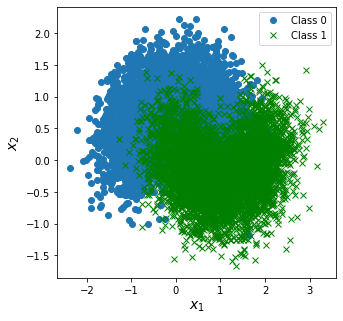

In [8]:
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)

fig = plt.figure(figsize=(5,5))
plt.plot(x[idx0,0], x[idx0,1], 'o', label='Class 0')
plt.plot(x[idx1,0], x[idx1,1], 'gx', label='Class 1')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$x_2$', fontsize=14)
plt.legend()
plt.savefig('knn_for_two_classes.png', dpi=600)
plt.show()

In [9]:
# Split array into random train and test subsets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [15]:
sub_con = ShuffleSplit(n_splits=1000, train_size=100, random_state=42)
sub_con.get_n_splits(x_train)

1000

In [18]:
n_train = 1
dtcs = []

for train_index, test_index in sub_con.split(x_train):
    print("train #" + str(n_train))
    n_train = n_train + 1
    
    dtc = DecisionTreeClassifier(criterion='gini', max_depth = None, max_leaf_nodes = 25)
    dtc.fit(x_train[train_index], y_train[train_index])
    
    dtcs.append(dtc)

train #1
train #2
train #3
train #4
train #5
train #6
train #7
train #8
train #9
train #10
train #11
train #12
train #13
train #14
train #15
train #16
train #17
train #18
train #19
train #20
train #21
train #22
train #23
train #24
train #25
train #26
train #27
train #28
train #29
train #30
train #31
train #32
train #33
train #34
train #35
train #36
train #37
train #38
train #39
train #40
train #41
train #42
train #43
train #44
train #45
train #46
train #47
train #48
train #49
train #50
train #51
train #52
train #53
train #54
train #55
train #56
train #57
train #58
train #59
train #60
train #61
train #62
train #63
train #64
train #65
train #66
train #67
train #68
train #69
train #70
train #71
train #72
train #73
train #74
train #75
train #76
train #77
train #78
train #79
train #80
train #81
train #82
train #83
train #84
train #85
train #86
train #87
train #88
train #89
train #90
train #91
train #92
train #93
train #94
train #95
train #96
train #97
train #98
train #99
train #100
train #1

train #891
train #892
train #893
train #894
train #895
train #896
train #897
train #898
train #899
train #900
train #901
train #902
train #903
train #904
train #905
train #906
train #907
train #908
train #909
train #910
train #911
train #912
train #913
train #914
train #915
train #916
train #917
train #918
train #919
train #920
train #921
train #922
train #923
train #924
train #925
train #926
train #927
train #928
train #929
train #930
train #931
train #932
train #933
train #934
train #935
train #936
train #937
train #938
train #939
train #940
train #941
train #942
train #943
train #944
train #945
train #946
train #947
train #948
train #949
train #950
train #951
train #952
train #953
train #954
train #955
train #956
train #957
train #958
train #959
train #960
train #961
train #962
train #963
train #964
train #965
train #966
train #967
train #968
train #969
train #970
train #971
train #972
train #973
train #974
train #975
train #976
train #977
train #978
train #979
train #980
train #981

In [19]:
frequence = [(0, 0)]*(len(x_test))

for i in range(len(dtcs)):
    y_pred = dtcs[i].predict(x_test)
    for j in range(len(x_test)):
        fs = frequence[j][0]
        sc = frequence[j][1]
        if( y_pred[j] == 0 ) : fs = fs + 1
        if( y_pred[j] == 1 ) : sc = sc + 1
        frequence[j] = (fs, sc)
        
y_pred = np.zeros(len(y_test))
for i in range(len(x_test)):
    fs = frequence[i][0]
    sc = frequence[i][1]
    if( fs >= sc ) : y_pred[i] = 0
    else : y_pred[i]= 1

accuracy = accuracy_score(y_test, y_pred) 
print(accuracy)

0.8672
